
<h1><center><B>Introduction to Tensorflow Lite</B></center></h1>

## Saved_model to tensorflow lite model 


In [ ]:
import tensorflow as tf
import pathlib

In [ ]:
#store data in form of x,y 
x = [1,2,-3,4,-2,-1]
y = [9,8,-5,0,-4,-3 ]

In [ ]:
#create a simple keras model 
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape = [1])])

In [ ]:
model.compile(optimizer='sgd', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 420ms/step - loss: 69.8688
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 58.8931
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 50.3296
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 43.6477
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 38.4337
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 34.3649
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 31.1895
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 28.7110
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 26.7763
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 25.2657
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 24.0861
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 23.1648
Epoch 13/500
1/1 [=============================

In [ ]:
#export save_model
export_dir  = '/content/saved_model'

In [ ]:
tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/saved_model/assets


In [ ]:
#convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_Model = converter.convert()

In [ ]:
#save tensorflowlite Model 
tflite_model_file = pathlib.Path('/content/foo.tflite')

In [ ]:
tflite_model_file.write_bytes(tflite_Model)

904

## keras Model to tensorflowlite model

In [ ]:
#load MobileNET tf.keras model
model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape = (224,224,3))

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
#convert the model 
converter1 = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_Model1 = converter1.convert()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmpuxipulu9/assets


In [ ]:
tflite_model_file1 = pathlib.Path('/content/foo1.tflite')

In [ ]:
tflite_model_file1.write_bytes(tflite_Model1)

13989544

### Concrete function to tensorflowlite Model 


In [ ]:
#Load MobileNet model from tf.keras
model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3))

In [ ]:
#get concrete function from keras model 
run_model = tf.function( lambda x : model(x))

In [ ]:
#save concrete function 
concrete_fun = run_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

In [ ]:
converter2 = tf.lite.TFLiteConverter.from_concrete_functions([concrete_fun])

In [ ]:
tflite_model_2  = converter2.convert()

In [ ]:
tflite_model_file2 = pathlib.Path('/content/foo.tflite')

In [ ]:
tflite_model_file2.write_bytes(tflite_model_2)

13989544

## command line conversion 


In [ ]:
# tflite_convert --output_file = model.tflite --saved_model_dir '/content/saved_model'
# tflite_convert --output_file = model.tflite --saved_model_file '/content/model.hdf5'

## Quantization


In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [ ]:
def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices((images)).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]

In [ ]:
def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 244, 244, 3)
      yield [data.astype(np.float32)]

In [ ]:
#Don't compatibity with interger only devices 
import tensorflow as tf
import numpy as np
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
tflite_quant_model = converter.convert()

In [ ]:
# To ensure compatibility with integer only devices (such as 8-bit microcontrollers) and accelerators (such as the Coral Edge TPU),
# you can enforce full integer quantization for all ops including the input and output
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

In [ ]:
# Define a generator
def generator():
  data = tfds.load()
  for _,in range(num_calibiration_steps):
    image, = data.take(1)
    yield(image)
    

In [ ]:
# convert saved model to tensflow lite model 
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

In [ ]:
#set the optimization mode(optimize_for_size)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tf_quant_model = converter.convert()

In [ ]:
#set the optimization mode(integer)
converter.optimizations = [tf.lite.Optimize.DEFAULT]


In [ ]:
#pass representative datasets to converter
converter.representative_dataset = tf.lite.RepresentativeDataset(generator)

In [ ]:
#restricting support target ops specification to INT8
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

## Interpreter of tensorflow lite 


In [ ]:
#Load tflite model and allocate tensors
interpreter =  tf.lite.Interpreter(model_content = tf_quant_model)
interpreter.allocate_tensors()

In [ ]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
point the data use in testing and run the interpreter 
interpreter.set_tensor(input_details[0]['index'],input_data)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

#Deploying a Linear Regression Model

In [ ]:
import tensorflow as tf
import pathlib

In [ ]:
#store data in form of x,y 
x = [-1,0,1,2,3,4]
y = [-3,-1,1,3,5,7]

In [ ]:
#create a simple keras model 
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape = [1])])

In [ ]:
model.compile(optimizer = 'sgd',loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs= 200)

Epoch 1/200
1/1 [==============================] - 0s 213ms/step - loss: 8.3443
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 6.7648
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 5.5180
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 4.5330
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 3.7542
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 3.1376
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 2.6486
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 2.2603
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 1.9511
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 1.7044
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 1.5067
Epoch 12/200
1/1 [==============================] - 0s 5ms/step - loss: 1.3478
Epoch 13/200
1/1 [==============================] - 0s 4ms/

In [ ]:
#export save_model
export_dir  = '/content/saved_model_1'

In [ ]:
tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: /content/saved_model_1/assets


INFO:tensorflow:Assets written to: /content/saved_model_1/assets


## Convert in tensoflowlite

In [ ]:
#convert the model to tensorflow lite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

In [ ]:
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/model_lite.tflite')

In [ ]:
tflite_model_file.write_bytes(tflite_model)

916

## Intilialize tflite interpreter

In [ ]:
interpreter = tf.lite.Interpreter(model_content= tflite_model)
interpreter.allocate_tensors()

In [ ]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

#Test tensorflowlite with randam data

In [ ]:
input_shape = input_details[0]['shape']
input, output = [] , []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype = np.float32)
  interpreter.set_tensor(input_details[0]['index'],input_data)
  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])
  #tflite test on random data 
  tf_result = model(tf.constant(input_data))
  output_data= np.array(tf_result)
  input.append(input_data[0][0])
  output.append(output_data[0][0])

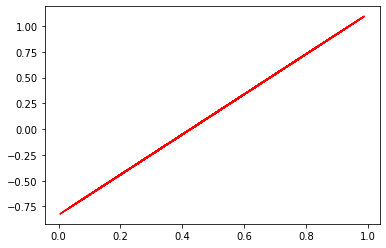

In [ ]:
import matplotlib.pyplot as plt
plt.plot(input,output,'r')
plt.show()